In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

from astropy.stats import LombScargle

import rayleigh

# where I'm writing down important functions I'm re-using
from stuff import *

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

# Fibonacci 1
In this notebook I have my first explorations with data ecoded with the Fibonacci sequence.

The approach here is to identify "events" (e.g. flares or transits) and then explore the wait-time distribution to see if it follows a Fibonacci sequence.

The positive aspect of this approach is that the sequence matching is shape agnostic, just exploring inter-event times. In the case of Fibonacci, it can pick up the sequence at any point

The negative aspect is of course requiring events to be found, and is therefore not "signal detection" but insted "pattern detection"

https://en.wikipedia.org/wiki/Integer_sequence

https://en.wikipedia.org/wiki/Fibonacci_number

In [4]:
fib(15)

array([  0.,   1.,   1.,   2.,   3.,   5.,   8.,  13.,  21.,  34.,  55.,
        89., 144., 233., 377.])

In [5]:
fib_approx(15)

array([  0,   1,   1,   2,   3,   5,   8,  13,  21,  34,  55,  89, 144,
       233, 377])

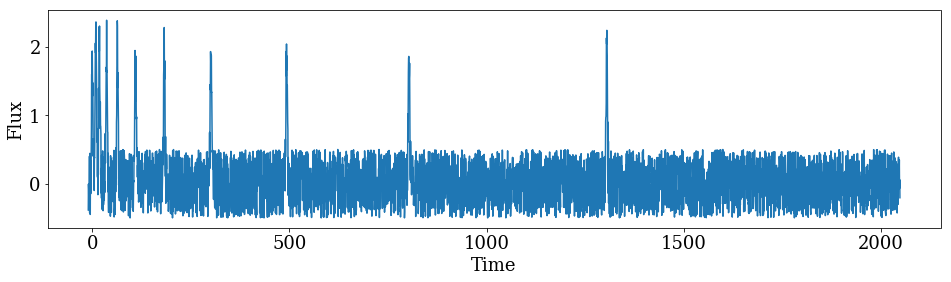

In [9]:
# let's make a Fib-spaced light curve pulse sequence

std = 1.8
tau = 9.123
amp = 2.
t0 = 10

time = np.arange(-10, 2048, 0.5)

flux = np.random.random(len(time))*1 - 0.5 
flux = flux + fib_gaus1(time, tau, amp, std, t0=t0)

plt.figure(figsize=(16,4))
plt.plot(time, flux)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.savefig('big_lc.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

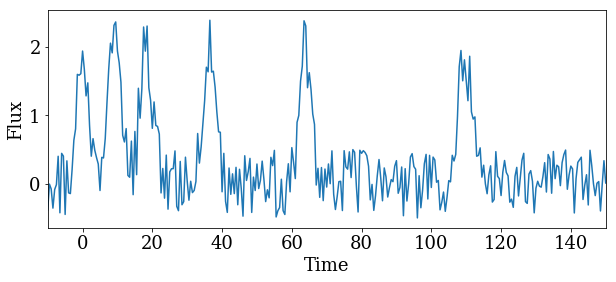

In [10]:
plt.figure(figsize=(10,4))
plt.plot(time, flux)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.xlim(-10,150)
# plt.arrow(4,2,3,0)
plt.savefig('small_lc.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

In [11]:
GR = 1.61803398875 # the GOLDEN RATIO (of course...)

## Lomb Scargle

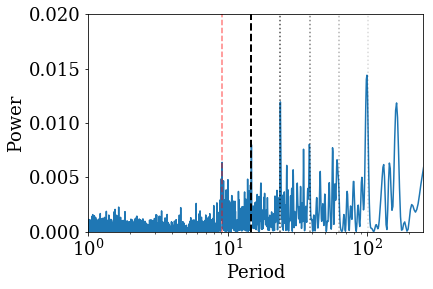

In [12]:
fspace = tau

frequency, power = LombScargle(time, flux).autopower()

plt.plot(1. / frequency, power)

plt.xscale('log')
plt.ylim(0,.02)

plt.plot([fspace, fspace],[0,1], c='r', linestyle='--', alpha=0.5)

# plt.plot([fspace*2, fspace*2],[0,1], c='r', linestyle=':', alpha=0.5)
plt.plot([fspace*GR, fspace*GR],[0,1], c='k', linestyle='--', lw=2)

plt.plot([fspace * GR**2, fspace * GR**2],[0,1], c='k', linestyle=':', alpha=0.7)
plt.plot([fspace * GR**3, fspace * GR**3],[0,1], c='k', linestyle=':', alpha=0.5)
plt.plot([fspace * GR**4, fspace * GR**4],[0,1], c='k', linestyle=':', alpha=0.3)
plt.plot([fspace * GR**5, fspace * GR**5],[0,1], c='k', linestyle=':', alpha=0.15)


plt.xlim(1, 250)
plt.xlabel('Period')
plt.ylabel('Power')
plt.savefig('LS.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

## Rayleigh

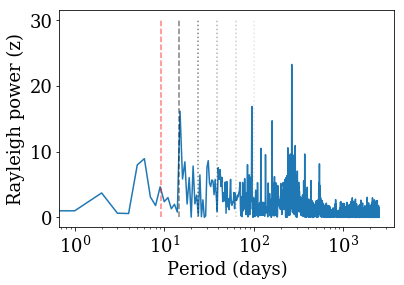

In [13]:
ps = rayleigh.RayleighPowerSpectrum(time[np.where((flux > 1.75))[0]], minper=1, maxper=250, nper=2500)

plt.figure()
plt.plot(ps)
plt.xlabel('Period (days)')
plt.ylabel('Rayleigh power (z)')
plt.xscale('log')

plt.plot([fspace, fspace],[0,30], c='r', linestyle='--', alpha=0.5)
# plt.plot([fspace*2, fspace*2],[0,30], c='r', linestyle=':', alpha=0.5)
# plt.plot([fspace*3, fspace*3],[0,30], c='r', linestyle=':', alpha=0.3)
# plt.plot([fspace*4, fspace*4],[0,30], c='r', linestyle=':', alpha=0.2)

plt.plot([fspace * GR, fspace * GR],[0,30], c='k', linestyle='--', alpha=0.5)
plt.plot([fspace * GR**2, fspace * GR**2],[0,30], c='k', linestyle=':', alpha=0.5)
plt.plot([fspace * GR**3, fspace * GR**3],[0,30], c='k', linestyle=':', alpha=0.3)
plt.plot([fspace * GR**4, fspace * GR**4],[0,30], c='k', linestyle=':', alpha=0.2)
plt.plot([fspace * GR**5, fspace * GR**5],[0,30], c='k', linestyle=':', alpha=0.1)

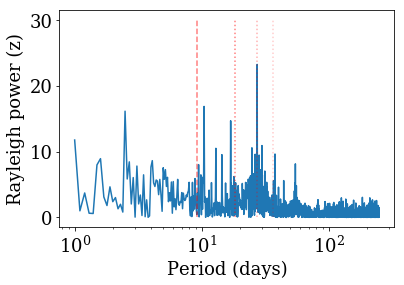

In [14]:
plt.figure()
plt.plot(np.linspace(1, 250, 2500), ps)
plt.xlabel('Period (days)')
plt.ylabel('Rayleigh power (z)')
plt.xscale('log')

plt.plot([fspace, fspace],[0,30], c='r', linestyle='--', alpha=0.5)
plt.plot([fspace*2, fspace*2],[0,30], c='r', linestyle=':', alpha=0.5)
plt.plot([fspace*3, fspace*3],[0,30], c='r', linestyle=':', alpha=0.3)
plt.plot([fspace*4, fspace*4],[0,30], c='r', linestyle=':', alpha=0.2)

# plt.plot([fspace*GR, fspace*GR],[0,30], c='k', linestyle='--', alpha=0.5)
# plt.plot([fspace * GR**2, fspace * GR**2],[0,30], c='k', linestyle=':', alpha=0.5)
# plt.plot([fspace * GR**3, fspace * GR**3],[0,30], c='k', linestyle=':', alpha=0.3)
# plt.plot([fspace * GR**4, fspace * GR**4],[0,30], c='k', linestyle=':', alpha=0.2)
# plt.plot([fspace * GR**5, fspace * GR**5],[0,30], c='k', linestyle=':', alpha=0.1)

## Testing a FIB sequence w/ brute force

In [15]:
true_fib = fib(10)
true_fib

array([ 0.,  1.,  1.,  2.,  3.,  5.,  8., 13., 21., 34.])

In [16]:
# the true Fib sequence + a small amount of noise
test1 = true_fib + np.random.random(10) * 0.01
test1

array([8.00515855e-03, 1.00609934e+00, 1.00341734e+00, 2.00648970e+00,
       3.00737398e+00, 5.00920880e+00, 8.00521278e+00, 1.30093819e+01,
       2.10058753e+01, 3.40067024e+01])

In [17]:
# random numbers
test2 = np.random.random(10) * true_fib.max()
test2.sort()
test2

array([ 0.56408198,  2.13099221,  6.71609002,  7.80107799,  8.52455229,
       10.71651744, 26.36527087, 26.88292061, 27.1098109 , 33.33462482])

can we tell that `test1` is a Fib sequence, and `test2` is not?

In [18]:
def fib_test1(x, tol=0.1):
    '''
    the most simple, brute-force tester, assume the sequence starts from the beginning!
    
    x = the timestamps of the events
    tol = the fudge-factor to accept
    '''
    # make the real Fib sequence for this size of numbers
    Fseq = fib(x.size)

    # assume the x[0] - x[1] sequence defines the key length
    # keylen = x[1] - x[0]

    # assume first event is exactly the start
    zp = x[0]
    
    # average the two first steps, since that should be the repeat. 
    # Helps reduce uncertainty by sqrt(N)
    keylen = ((x[2] - x[0]) + (x[1] - x[0])) / 2.

    # using the key-length, test against the perfect Fib seq
    test_seq = ((x[1:] - zp) / keylen) / Fseq[1:] - 1 
    isok = np.abs(test_seq) < tol

    print('keylen = ' + str(keylen))

    return isok

In [19]:
(fib_test1(test1))

keylen = 0.9967531854407139


array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [20]:
fib_test1(test2)

keylen = 3.85945913171824


array([False, False,  True, False, False, False, False, False, False])

In [21]:
def fib_test2(x, tol=0.1):
    '''
    2nd simple approach:
    given a sequence of spacings, 
    does the previous two predict the one time via The Fib(TM)?
    
    x.size must be > 3
    '''
    
    pred = (x[0:-2] + x[1:-1]) - x[2:]
    
    test = np.abs(pred) < tol
    print(test)
    
    return sum(test) / np.float(x.size-2)

In [22]:
fib_test2(test1)

[ True  True  True  True  True  True  True  True]


1.0

In [23]:
fib_test2(test2)

[False False False False False False False False]


0.0

In [24]:
test3 = np.concatenate([test2, test1, test2])
fib_test2(test3)

[False False False False False False False False False False  True  True
  True  True  True  True  True  True False False False False False False
 False False False False]


0.2857142857142857

In [25]:
# plt.plot(np.arange(10), fib_approx(10), '-o')
# plt.plot((test1[0:-2] + test1[1:-1]) - test1[2:] , '-o')

In [26]:
def fib_dt(x, tol=0.1, extra = False):
    '''
    simple approach 2b:
    given a sequence of spacings, 
    does the previous three obs predict the next one?
    
    x.size must be > 3
    '''
    
    pred = ((x[2:-1] - x[1:-2]) + (x[1:-2] - x[0:-3])  + x[2:-1]) - x[3:]
    
    test = np.abs(pred) < tol

    if extra:
        print(test)
        
    return float(sum(test)) / np.float(x.size-2)